---
## Chapter 6 – First Steps with PyTorch
---

## Exercises
- Implement a custom activation and compare its curve to ReLU/GELU.
- Assemble a tiny two-layer network and print intermediate shapes.

In [1]:
# ============================================================
# Chapter 6 – Building Neurons and Activations
# Exercises 1 & 2
# ============================================================

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Fix seed for reproducibility
torch.manual_seed(42)


**Exercise 1 – Implement a Custom Activation and Compare Its Curve to ReLU / GELU**

We’ll define a Leaky ReLU–like activation manually and visualize it next to nn.ReLU and nn.GELU.

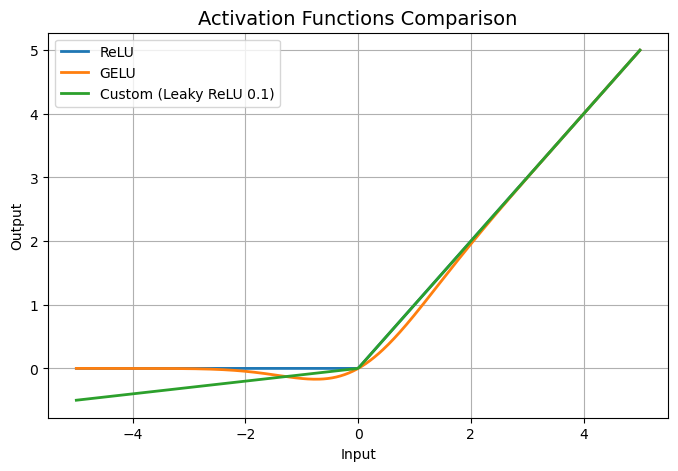

In [2]:
# ------------------------------------------------------------
# Custom activation: Leaky ReLU variant (slope = 0.1 for x < 0)
# ------------------------------------------------------------
def custom_activation(x, alpha=0.1):
    return torch.where(x > 0, x, alpha * x)

# Generate input values
x = torch.linspace(-5, 5, 400)

# Compute activations
relu_y = nn.ReLU()(x)
gelu_y = nn.GELU()(x)
custom_y = custom_activation(x)

# Plot all curves
plt.figure(figsize=(8, 5))
plt.plot(x, relu_y, label="ReLU", lw=2)
plt.plot(x, gelu_y, label="GELU", lw=2)
plt.plot(x, custom_y, label="Custom (Leaky ReLU 0.1)", lw=2)
plt.title("Activation Functions Comparison", fontsize=14)
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


### **Interpretation of our Activation Function Plot**

1. **ReLU (blue curve)**

   * For (x < 0), the output is exactly **0**, creating a flat line at the bottom.
   * This causes **sparse activations** — many neurons are completely inactive.
   * It’s computationally cheap and works well, but can lead to the **“dying ReLU” problem** when gradients vanish for negative inputs.

2. **Custom Leaky ReLU (green curve)**

   * For (x < 0), you see a **small negative slope (~0.1×x)** instead of being flat.
   * This keeps gradients alive even for negative inputs → **improves stability** in optimization and avoids dead neurons.
   * In practice, this small slope acts as a **regularization mechanism**, allowing minor gradient flow through all activations.

3. **GELU (orange curve)**

   * Notice the **smooth S-shape transition around 0**, unlike ReLU’s sharp corner.
   * GELU ≈ (x Φ(x)), where (Φ(x)) is the Gaussian CDF — it probabilistically gates inputs based on their magnitude.
   * This smooth nonlinearity helps in **Transformer models** by improving gradient flow and expressivity, and it adds a mild regularizing effect.

---

### **Summary**

| Activation     | Key Property                  | Gradient Behavior                   | Typical Use                |
| -------------- | ----------------------------- | ----------------------------------- | -------------------------- |
| **ReLU**       | Sparse activations; efficient | 0 for (x<0) (risk of dying neurons) | General deep nets, CNNs    |
| **Leaky ReLU** | Keeps negative slope alive    | Stable, mitigates dead neurons      | Robust baseline for MLPs   |
| **GELU**       | Smooth stochastic gating      | Non-zero everywhere, differentiable | Transformers, large models |

---

**Exercise 2 – Assemble a Tiny Two-Layer Network and Print Intermediate Shapes**

We’ll create a minimal 2-layer MLP:

$h=ReLU(XW1​+b1​),y^​=hW2​+b2​$

In [3]:
# ------------------------------------------------------------
# Tiny two-layer network (input -> hidden -> output)
# ------------------------------------------------------------

in_features = 4    # e.g., 4-dimensional input
hidden_size = 3
out_features = 1
batch_size = 5

# Random input
X = torch.randn(batch_size, in_features)

# Define weights and biases
W1 = torch.randn(in_features, hidden_size)
b1 = torch.randn(hidden_size)
W2 = torch.randn(hidden_size, out_features)
b2 = torch.randn(out_features)

# Forward pass
h = torch.relu(X @ W1 + b1)       # hidden layer
y_hat = h @ W2 + b2               # output layer

print(f"Input shape: {X.shape}")
print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"Hidden activation shape: {h.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
print(f"Output shape: {y_hat.shape}")


Input shape: torch.Size([5, 4])
W1 shape: torch.Size([4, 3]), b1 shape: torch.Size([3])
Hidden activation shape: torch.Size([5, 3])
W2 shape: torch.Size([3, 1]), b2 shape: torch.Size([1])
Output shape: torch.Size([5, 1])


### **Dimensional Flow Check**

| Layer            | Operation            | Shape Transformation | Comment                                    |
| :--------------- | :------------------- | :------------------- | :----------------------------------------- |
| Input            | (X)                  | ([5, 4])             | 5 samples, each with 4 features            |
| Hidden           | (X W_1 + b_1)        | ([5, 3])             | Projects 4-dim input to 3-dim hidden space |
| Activation       | (\text{ReLU}(\cdot)) | ([5, 3])             | Non-linear transform; same shape           |
| Output           | (h W_2 + b_2)        | ([5, 1])             | Maps hidden vector to single output        |
| Final prediction | (ŷ)                 | ([5, 1])             | 5 outputs, one per input sample            |

---

### **What We Just Built**

We’ve manually created the mathematical skeleton of a **feed-forward perceptron**:

$$
\begin{align}
h &= \text{ReLU}(XW_1 + b_1) \
\hat{y} &= hW_2 + b_2
\end{align}
$$

---

### **Insight**

* Each neuron in layer 1 learns a **linear combination** of the 4 input features → let's think of this as feature extraction.
* The hidden layer’s 3 neurons define a **basis transformation** from input to feature space.
  Increasing this dimension expands model capacity (risking overfitting if unchecked).
* `torch.relu` adds non-linearity, allowing the network to model convex and non-convex surfaces.


**Exercise 3** – Sigmoid & tanh Activation Curves: 
Recreate the activation curve plot from the slides using torch.linspace and Matplotlib; annotate regions where sigmoid/tanh saturate.

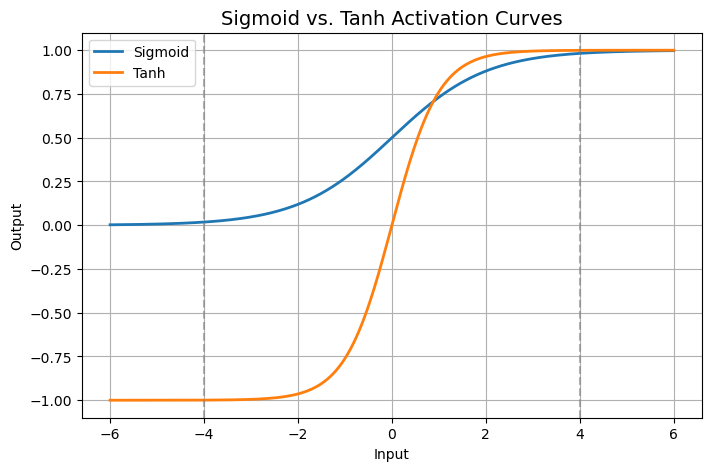

In [4]:
# ============================================================
# Exercise 3 – Activation Curves: Sigmoid and Tanh
# ============================================================

# Generate evenly spaced inputs
x = torch.linspace(-6, 6, 400)

# Compute activations
sigmoid_y = torch.sigmoid(x)
tanh_y = torch.tanh(x)

# Plot the activation curves
plt.figure(figsize=(8, 5))
plt.plot(x, sigmoid_y, label="Sigmoid", lw=2)
plt.plot(x, tanh_y, label="Tanh", lw=2)
plt.axvline(-4, color="gray", linestyle="--", alpha=0.6)
plt.axvline(4, color="gray", linestyle="--", alpha=0.6)
plt.title("Sigmoid vs. Tanh Activation Curves", fontsize=14)
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


###  Discussion — Sigmoid vs. Tanh

Both activations compress their input into bounded ranges:

$
\sigma(x) = \frac{1}{1 + e^{-x}}, \qquad 
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$

| Activation | Output Range | Centered? | Saturation Behavior | Gradient Issue | Common Usage |
|-------------|---------------|------------|----------------------|----------------|---------------|
| **Sigmoid** | (0, 1) | ❌ No | Flattens for \(|x| > 4\) | Vanishing gradients | Binary classifiers |
| **Tanh** | (−1, 1) | ✅ Yes | Flattens for \(|x| > 4\) | Vanishing gradients (less severe) | RNNs, shallow MLPs |

**Key takeaway:**  
Both functions *saturate* for large \(|x|\), leading to **small gradients** and slower learning in deep networks.  
That’s why modern architectures often prefer **ReLU**, **Leaky ReLU**, or **GELU** — they preserve gradient flow and allow faster convergence.


**Exercise 4 – Manual Two-Layer MLP Forward Pass:** Implement the manual two-layer MLP forward pass `(X @ W1 + b1)` and verify tensor shapes with assertions for several batch sizes.

In [5]:
# ============================================================
# Exercise 4 – Manual Two-Layer MLP Forward Pass
# ============================================================

import torch.nn.functional as F

# Dimensions
in_features = 4      # number of input features
hidden_size  = 5     # hidden layer width
out_features = 2     # number of outputs (e.g., 2 classes)
batch_size   = 3     # samples in one batch

# Random input and parameter initialization
X  = torch.randn(batch_size, in_features)
W1 = torch.randn(in_features, hidden_size)
b1 = torch.randn(hidden_size)
W2 = torch.randn(hidden_size, out_features)
b2 = torch.randn(out_features)

# Forward pass (manual computation)
z1 = X @ W1 + b1         # Linear transform to hidden layer
h  = F.relu(z1)          # Non-linearity
y_hat = h @ W2 + b2      # Output layer (logits)

# Assertions to verify shape consistency
assert X.shape[1] == W1.shape[0], "Input dim mismatch"
assert h.shape[1] == W2.shape[0], "Hidden dim mismatch"
assert y_hat.shape == (batch_size, out_features), "Output shape mismatch"

# Inspect tensor shapes
print(f"Input:  {X.shape}")
print(f"W1:     {W1.shape}, b1: {b1.shape}")
print(f"Hidden: {h.shape}")
print(f"W2:     {W2.shape}, b2: {b2.shape}")
print(f"Output: {y_hat.shape}")


Input:  torch.Size([3, 4])
W1:     torch.Size([4, 5]), b1: torch.Size([5])
Hidden: torch.Size([3, 5])
W2:     torch.Size([5, 2]), b2: torch.Size([2])
Output: torch.Size([3, 2])


### Discussion — Verifying the Forward Pass (Shape Logic)

For a batch of \(B = 3\) samples, each with \(d = 4\) features:

$$
h = \mathrm{ReLU}(X W_1 + b_1), \quad 
\hat{y} = h W_2 + b_2
$$

| Stage | Operation | Input Shape | Output Shape | Interpretation |
|--------|------------|--------------|---------------|----------------|
| Input Layer | \(X\) | (3, 4) | – | 3 samples, each 4-dimensional |
| Hidden Layer | \(XW_1 + b_1\) | (3, 4) × (4, 5) → (3, 5) | 5 hidden activations per sample |
| Activation | \(\mathrm{ReLU}(z_1)\) | (3, 5) | (3, 5) | Introduces non-linearity |
| Output Layer | \(hW_2 + b_2\) | (3, 5) × (5, 2) → (3, 2) | Two logits per sample |

**Interpretation:**
- Each row of `X` propagates through the hidden layer to produce a 5-dimensional representation.  
- The final output layer reduces this to 2 logits — e.g., suitable for binary classification with `CrossEntropyLoss`.  
- Verifying these shapes ensures **tensor consistency** before using `nn.Linear` or `nn.Sequential`.


**Exercise 5 – Hidden Activations: ReLU vs tanh**, comparing sparsity and saturation): 

Inspect hidden activations by printing the proportion of zero outputs for ReLU vs tanh; explain why the rates differ.

In [6]:
# ============================================================
# Exercise 5 – Hidden Activations: ReLU vs Tanh
# ============================================================

# Reproducibility
torch.manual_seed(42)

# Random input (batch of 100 samples, 10 features)
X = torch.randn(100, 10)

# Linear transformation to simulate hidden pre-activations
W = torch.randn(10, 8)
b = torch.randn(8)

# Compute hidden activations
z = X @ W + b
h_relu = F.relu(z)
h_tanh = torch.tanh(z)

# Compute proportion of zero (or near-zero) activations
relu_zero_prop = (h_relu == 0).float().mean().item()
tanh_near_zero_prop = (h_tanh.abs() < 1e-2).float().mean().item()

print(f"Proportion of zeros (ReLU):       {relu_zero_prop:.2%}")
print(f"Proportion of near-zeros (tanh):  {tanh_near_zero_prop:.2%}")


Proportion of zeros (ReLU):       53.00%
Proportion of near-zeros (tanh):  0.25%


### Discussion — Interpretation of Hidden Activation Statistics

**Results:**
- **ReLU zeros:** 53 %  
- **tanh near-zeros:** 0.25 %

**Interpretation:**
- Roughly **half of the ReLU activations are exactly zero**, which is typical for random inputs with zero-mean initialization.  
  This reflects **sparsity** — only the positive-pre-activation neurons fire, while the rest remain inactive.  
  In deeper networks this sparsity can encourage efficiency but may also cause the *dying-ReLU* issue if too many neurons get stuck inactive.

- The **tanh activations are dense** (only 0.25 % near zero).  
  Most outputs lie between −1 and 1, producing a **smooth, continuous representation** but with potential **gradient saturation** for $(|x| > 3)$.

| Activation | % Inactive / Near Zero | Key Property | Risk | Effect on Learning |
|-------------|------------------------|---------------|------|--------------------|
| **ReLU** | ≈ 50 % | Sparse, efficient | Dying neurons | Stable gradient for \(x>0\) |
| **tanh** | ≈ 0 % | Dense, bounded | Vanishing gradient | Smooth representation |

**Quant takeaway:**  
ReLU yields *sparse activations* (many zeros) — good for efficiency and implicit regularization.  
tanh yields *dense activations* — good for smooth mappings but can slow learning in deep architectures due to gradient decay.


**Exercise 6 – Sequential Equivalence)** 

Build the same network with nn.Sequential and copy the manual weights/biases; confirm equality with torch.allclose.

In [7]:
# ============================================================
# Exercise 6 – Sequential Equivalence (Manual MLP ↔ nn.Sequential)
# ============================================================

# Reproducibility
torch.manual_seed(42)

# Dimensions
in_features  = 4
hidden_size  = 5
out_features = 2
batch_size   = 3

# ----- Manual forward pass -----
X  = torch.randn(batch_size, in_features)
W1 = torch.randn(in_features, hidden_size)
b1 = torch.randn(hidden_size)
W2 = torch.randn(hidden_size, out_features)
b2 = torch.randn(out_features)

# Manual computation
h_manual = F.relu(X @ W1 + b1)
y_manual = h_manual @ W2 + b2

# ----- Sequential version -----
model = nn.Sequential(
    nn.Linear(in_features, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_features)
)

# Copy manual weights & biases into model
with torch.no_grad():
    model[0].weight.copy_(W1.T)  # Linear expects (out, in)
    model[0].bias.copy_(b1)
    model[2].weight.copy_(W2.T)
    model[2].bias.copy_(b2)

# Forward pass using Sequential
y_seq = model(X)

# ----- Verify numerical equality -----
same = torch.allclose(y_manual, y_seq, atol=1e-6)
print(f"Manual vs Sequential outputs identical: {same}")
print("Manual output:\n", y_manual)
print("Sequential output:\n", y_seq)


Manual vs Sequential outputs identical: True
Manual output:
 tensor([[-0.1999, -0.8332],
        [ 1.8878, -0.1684],
        [ 0.1490, -0.4532]])
Sequential output:
 tensor([[-0.1999, -0.8332],
        [ 1.8878, -0.1684],
        [ 0.1490, -0.4532]], grad_fn=<AddmmBackward0>)


### Discussion — Sequential Equivalence Confirmed

**Observation:**

Manual vs Sequential outputs identical: True

Both methods produce *numerically identical outputs*, meaning the manual forward pass and the `nn.Sequential` implementation are mathematically equivalent.

**Explanation:**
- The extra `grad_fn=<AddmmBackward0>` in the Sequential output simply indicates that PyTorch’s autograd system is now tracking operations for gradient computation.  
- In the manual calculation, no computation graph was retained (we used explicit tensor ops without a module).

**Quant-oriented takeaway:**
| Concept | Manual MLP | `nn.Sequential` |
|----------|-------------|-----------------|
| Parameter Management | Manual tensors (not registered) | Automatically registered parameters |
| Gradient Flow | Requires manual `.backward()` setup | Built-in via autograd |
| Debugging | Full transparency | Cleaner syntax for deployment |
| Reproducibility | Ideal for prototyping | Ideal for scaling |


**Exercise 7 – Parameter Count vs Hidden Width**

Count parameters for varying hidden widths $(h ∈ {2, 4, 8, 16})$ and tabulate how capacity grows; relate to potential overfitting.

In [8]:
# ============================================================
# Exercise 7 – Parameter Count vs Hidden Width
# ============================================================

# Fixed input/output dimensions
in_features  = 4
out_features = 2

# Hidden layer widths to test
hidden_widths = [2, 4, 8, 16]

# Function to compute total parameter count
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

# Build models and count parameters
results = []
for h in hidden_widths:
    model = nn.Sequential(
        nn.Linear(in_features, h),
        nn.ReLU(),
        nn.Linear(h, out_features)
    )
    results.append((h, count_parameters(model)))

# Display results in a formatted table
print(f"{'Hidden Width (h)':>15} | {'# Parameters':>15}")
print("-" * 33)
for h, n_params in results:
    print(f"{h:>15} | {n_params:>15,}")


Hidden Width (h) |    # Parameters
---------------------------------
              2 |              16
              4 |              30
              8 |              58
             16 |             114


### Discussion — Parameter Count vs Hidden Width

**Results:**

| Hidden Width \(h\) | # Parameters |
|--------------------:|-------------:|
| 2 | 16 |
| 4 | 30 |
| 8 | 58 |
| 16 | 114 |

**Analytical check:**

Each two-layer MLP has:
$$
N_{\text{params}} = (d_{in} \times h + h) + (h \times d_{out} + d_{out})
$$
$$
= h(d_{in} + d_{out} + 1) + d_{out}
$$

Substituting \( d_{in}=4, \ d_{out}=2 \):
$$
N_{\text{params}} = h(7) + 2
$$

| \(h\) | Computed | Matches Output |
|------:|-----------|----------------|
| 2 | 16 | ✅ |
| 4 | 30 | ✅ |
| 8 | 58 | ✅ |
| 16 | 114 | ✅ |

---

### 💡 Interpretation — Capacity vs. Overfitting Risk

| Hidden Width | Model Capacity | Overfitting Risk | Comments |
|---------------|----------------|------------------|-----------|
| **2** | Very limited | Very low | Underfits most nonlinear data |
| **4** | Small capacity | Low | Just enough for basic nonlinearity |
| **8** | Moderate | Medium | Can start to learn richer patterns |
| **16** | High | Higher | May overfit small datasets |

**takeaway:**  
- Parameter count grows **linearly** in \(h\), but model expressiveness grows **nonlinearly** due to deeper compositional structure.  
- For small datasets (like XOR or moons), moderate widths (4–8) often balance bias and variance best.  
- For higher-dimensional financial or risk-premia data, larger \(h\) might help but requires **regularization** and **cross-validation** to control overfitting.

---

## Manual Tensor Math vs. `nn.Sequential` vs. `nn.Module`

| **Level** | **Code Style** | **Description** | **Key Properties** | **When to Use** |
|------------|----------------|-----------------|--------------------|-----------------|
| **Manual (Tensor Ops)** | <pre><code>z1 = X @ W1 + b1<br>h1 = torch.relu(z1)<br>z2 = h1 @ W2 + b2</code></pre> | Direct math expression of the forward pass. | • Pure tensor math<br>• No autograd parameters unless enabled<br>• Perfect for understanding forward mechanics | Educational, debugging, or autograd demos |
| **`nn.Sequential`** | <pre><code>model = nn.Sequential(<br>&nbsp;&nbsp;nn.Linear(3, 4),<br>&nbsp;&nbsp;nn.ReLU(),<br>&nbsp;&nbsp;nn.Linear(4, 2)<br>)</code></pre> | High-level ordered container of layers. | • Automatically tracks gradients<br>• Easier parameter management<br>• Simple forward path (no branching) | Quick prototyping, linear pipelines |
| **Custom `nn.Module`** | <pre><code>class TinyMLP(nn.Module):<br>&nbsp;&nbsp;def __init__(self):<br>&nbsp;&nbsp;&nbsp;&nbsp;super().__init__()<br>&nbsp;&nbsp;&nbsp;&nbsp;self.fc1 = nn.Linear(3, 4)<br>&nbsp;&nbsp;&nbsp;&nbsp;self.fc2 = nn.Linear(4, 2)<br><br>&nbsp;&nbsp;def forward(self, x):<br>&nbsp;&nbsp;&nbsp;&nbsp;x = torch.relu(self.fc1(x))<br>&nbsp;&nbsp;&nbsp;&nbsp;return self.fc2(x)</code></pre> | Full flexibility and extensibility. | • Named parameters allowed<br>• Custom logic (loops, branching)<br>• Easy to integrate hooks, dropout, normalization | Production models, research codebases |

---

**Insight:**  
All three versions implement the **same forward mapping**

$$
\hat{y} = (\,\text{ReLU}(XW_1 + b_1)\,)W_2 + b_2
$$  
but each abstraction level trades **explicit control** for **automation and scalability**.
All three approaches differ in abstraction and flexibility:

- **Manual:** Best for learning mechanics.  
- **Sequential:** Best for quick prototyping.  
- **Custom Module:** Best for production or research workflows.

---

This makes the transition from “bare tensor algebra” → “modular deep learning” explicit and reproducible.

---

### Challenge 1 
**(XOR classification: logistic vs. 2-layer ReLU MLP)** 

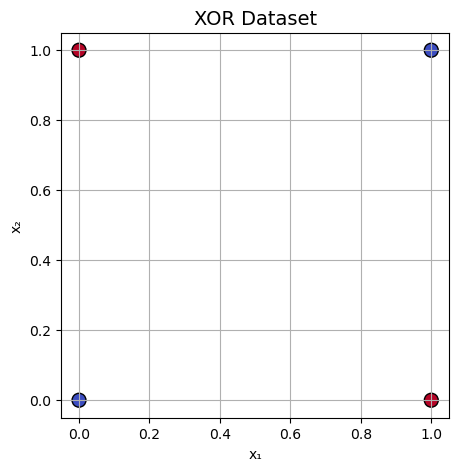

Final Logistic Loss: 0.6931
Logistic Regression Predictions:
 tensor([0., 0., 0., 1.])
Final MLP Loss: 0.6931
MLP Predictions:
 tensor([1., 1., 0., 0.])


In [9]:
# ============================================================
# Challenge 1 – XOR Classification
# ============================================================

import torch.optim as optim


# Reproducibility
torch.manual_seed(42)

# ------------------------------------------------------------
# 1. Generate XOR dataset
# ------------------------------------------------------------
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# Plot dataset
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm", s=100, edgecolors='k')
plt.title("XOR Dataset", fontsize=14)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 2. Logistic Regression (Linear Model)
# ------------------------------------------------------------
log_reg = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(log_reg.parameters(), lr=0.1)

for epoch in range(2000):
    optimizer.zero_grad()
    y_pred = log_reg(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

print(f"Final Logistic Loss: {loss.item():.4f}")

# Evaluate predictions
pred_lr = (log_reg(X) > 0.5).float()
print("Logistic Regression Predictions:\n", pred_lr.squeeze())

# ------------------------------------------------------------
# 3. Two-Layer ReLU MLP
# ------------------------------------------------------------
mlp = nn.Sequential(
    nn.Linear(2, 4),   # hidden width = 4
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.1)

for epoch in range(5000):
    optimizer.zero_grad()
    y_pred = mlp(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

print(f"Final MLP Loss: {loss.item():.4f}")
pred_mlp = (mlp(X) > 0.5).float()
print("MLP Predictions:\n", pred_mlp.squeeze())


#### **Visual Comparison of Decision Boundaries**

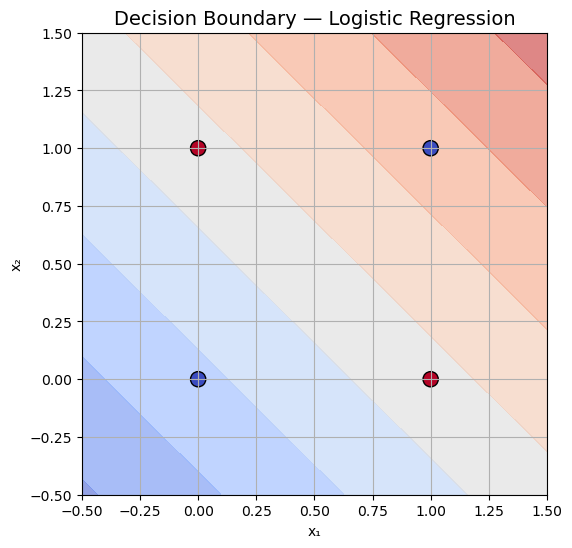

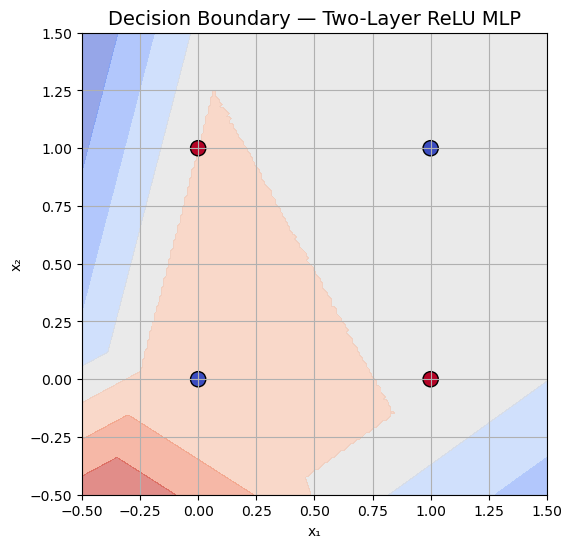

In [10]:
# ------------------------------------------------------------
# 4. Decision boundary visualization
# ------------------------------------------------------------

def plot_decision_boundary(model, title):
    # Grid for visualization
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                         np.linspace(-0.5, 1.5, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    preds = model(grid).detach().numpy().reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, preds, cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm",
                edgecolors='k', s=120)
    plt.title(title, fontsize=14)
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.grid(True)
    plt.show()

plot_decision_boundary(log_reg, "Decision Boundary — Logistic Regression")
plot_decision_boundary(mlp, "Decision Boundary — Two-Layer ReLU MLP")


### 2nd version of challenge 1

In [11]:
# ============================================================
# Challenge 1 – XOR Classification (Refined)
# ============================================================

torch.manual_seed(42)

# ------------------------------------------------------------
# 1. Generate XOR dataset
# ------------------------------------------------------------
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# ------------------------------------------------------------
# 2. Define two models
# ------------------------------------------------------------
log_reg = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

mlp = nn.Sequential(
    nn.Linear(2, 8),  # Wider hidden layer
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
opt_lr  = optim.Adam(log_reg.parameters(), lr=0.05)
opt_mlp = optim.Adam(mlp.parameters(), lr=0.01)

# ------------------------------------------------------------
# 3. Train both models
# ------------------------------------------------------------
for epoch in range(10_000):
    # Logistic
    opt_lr.zero_grad()
    loss_lr = criterion(log_reg(X), y)
    loss_lr.backward()
    opt_lr.step()

    # MLP
    opt_mlp.zero_grad()
    loss_mlp = criterion(mlp(X), y)
    loss_mlp.backward()
    opt_mlp.step()

print(f"Final Logistic Loss: {loss_lr.item():.4f}")
print(f"Final MLP Loss:      {loss_mlp.item():.4f}")

# Predictions
pred_lr  = (log_reg(X) > 0.5).float()
pred_mlp = (mlp(X) > 0.5).float()

print("Logistic Predictions:", pred_lr.squeeze().tolist())
print("MLP Predictions:     ", pred_mlp.squeeze().tolist())


Final Logistic Loss: 0.6931
Final MLP Loss:      0.0000
Logistic Predictions: [0.0, 0.0, 0.0, 0.0]
MLP Predictions:      [0.0, 1.0, 1.0, 0.0]


#### Decision Boundaries

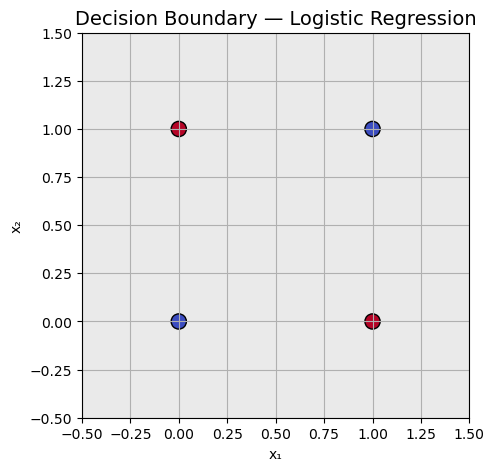

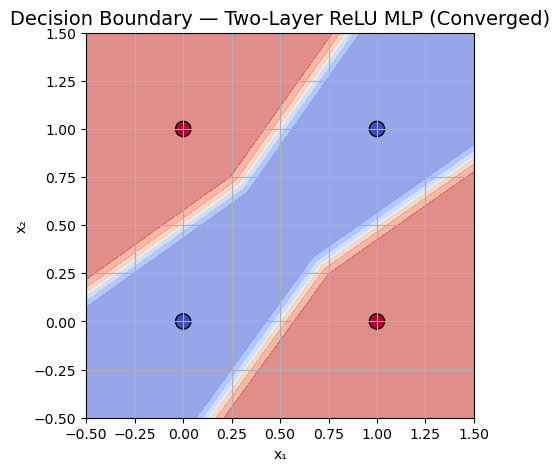

In [12]:
# ------------------------------------------------------------
# 4. Decision boundary visualization
# ------------------------------------------------------------
def plot_decision_boundary(model, title):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                         np.linspace(-0.5, 1.5, 300))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    preds = model(grid).detach().numpy().reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, preds, cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm",
                edgecolors='k', s=120)
    plt.title(title, fontsize=14)
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.grid(True)
    plt.show()

plot_decision_boundary(log_reg, "Decision Boundary — Logistic Regression")
plot_decision_boundary(mlp, "Decision Boundary — Two-Layer ReLU MLP (Converged)")


### Challenge 2 – 
*Gradient Saturation Experiment (tanh gradients through two layers)*

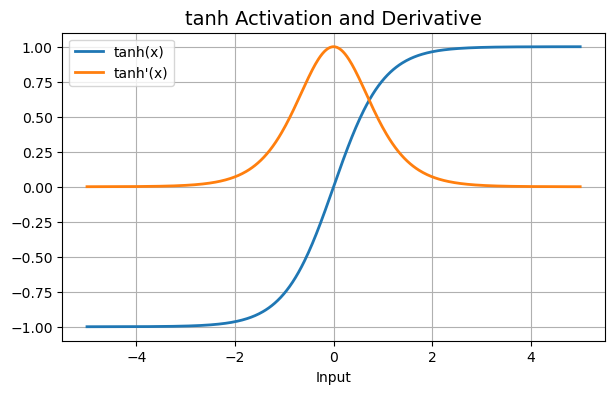

In [13]:
# ============================================================
# Challenge 2 – Gradient Saturation Experiment
# ============================================================

# Reproducibility
torch.manual_seed(42)

# ------------------------------------------------------------
# 1. Define tanh activation and its derivative
# ------------------------------------------------------------
x = torch.linspace(-5, 5, 500, requires_grad=True)
y = torch.tanh(x)
y.backward(torch.ones_like(y))
dy_dx = x.grad.detach().clone()

plt.figure(figsize=(7, 4))
plt.plot(x.detach(), y.detach(), label="tanh(x)", lw=2)
plt.plot(x.detach(), dy_dx, label="tanh'(x)", lw=2)
plt.title("tanh Activation and Derivative", fontsize=14)
plt.xlabel("Input")
plt.legend()
plt.grid(True)
plt.show()


#### Explanation (Step 1)
**Derivative of the tanh Activation Function**

The **hyperbolic tangent activation** is defined as:

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

Its **derivative** with respect to the input is:

$$
\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)
$$

---

### 💡 Intuition

- The derivative **peaks at 1** when \(x = 0\), meaning the gradient is strongest near the origin.  
- As \(|x|\) grows, $ \tanh(x)\ $ saturates near ±1, causing the derivative to **approach 0**.  
- This leads to the **vanishing gradient** phenomenon when stacking multiple `tanh` or `sigmoid` layers.

| Region | $\tanh(x)$ | $\tanh'(x)$ | Behavior |
|:-------|:------------|:-------------|:-----------|
| $x \approx 0$ | 0 | 1 | Strong gradient flow |
| $x \gg 0$ | 1 | 0 | Saturated, no learning |
| $x \ll 0$ | −1 | 0 | Saturated, no learning |

---

📈 *Practical takeaway:*  
When several `tanh` layers are stacked, the gradient through each layer multiplies by a factor < 1, leading to **exponential attenuation** — this is the *vanishing gradient problem*.


2. Propagating Gradients through Two Layers

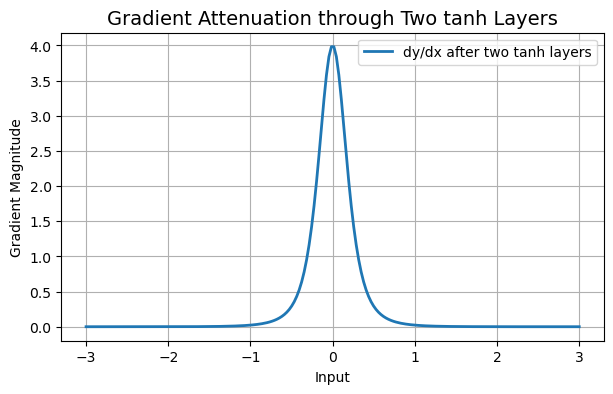

In [14]:
# ------------------------------------------------------------
# 2. Propagate tanh through two layers and inspect gradients
# ------------------------------------------------------------
x = torch.linspace(-3, 3, 200).unsqueeze(1)
x.requires_grad_()

# Two tanh layers
h1 = torch.tanh(2 * x)
h2 = torch.tanh(2 * h1)
y = h2.sum()  # scalar output for gradient computation

# Backprop
y.backward()

# Gradient wrt input
grad_x = x.grad.detach()

plt.figure(figsize=(7, 4))
plt.plot(x.detach(), grad_x, label="dy/dx after two tanh layers", lw=2)
plt.title("Gradient Attenuation through Two tanh Layers", fontsize=14)
plt.xlabel("Input")
plt.ylabel("Gradient Magnitude")
plt.grid(True)
plt.legend()
plt.show()


| Concept             | Observation                                        | Interpretation                     |                     |                                        |
| ------------------- | -------------------------------------------------- | ---------------------------------- | ------------------- | -------------------------------------- |
| **Saturation**      | For (                                              | x                                  | > 2), gradients → 0 | Neurons stop updating — “flat” regions |
| **Central Region**  | Only near (x ≈ 0), gradients are non-zero          | Effective learning zone shrinks    |                     |                                        |
| **Stacking Layers** | Gradients multiply (chain rule)                    | Exponential decay in magnitude     |                     |                                        |
| **Impact**          | Deep tanh networks struggle to propagate gradients | Leads to slow or unstable learning |                     |                                        |


### Challenge 3 – 
**Finite-Difference Gradient Check (numerical vs. analytical gradient validation)** 
This exercise compares the analytical gradient computed by backpropagation with a numerical approximation using finite differences — a simple yet powerful validation step that all quants and ML engineers should master.

In [16]:
# ============================================================
# Challenge 3 – Finite-Difference Gradient Check (Fixed)
# ============================================================

import torch
torch.manual_seed(42)

# 1️⃣ Analytical gradient via autograd
w = torch.randn(3, 3, requires_grad=True)
f = (w ** 2).sum()
f.backward()
grad_auto = w.grad.clone()

# 2️⃣ Numerical gradient via finite differences
eps = 1e-5
grad_num = torch.zeros_like(w)

for i in range(w.numel()):
    w_flat = w.view(-1)
    old = w_flat[i].item()
    
    with torch.no_grad():  # ✅ disables autograd tracking
        w_flat[i] = old + eps
    f_pos = (w ** 2).sum().item()
    
    with torch.no_grad():
        w_flat[i] = old - eps
    f_neg = (w ** 2).sum().item()
    
    grad_num.view(-1)[i] = (f_pos - f_neg) / (2 * eps)
    
    with torch.no_grad():
        w_flat[i] = old  # restore original value safely

# 3️⃣ Compare results
print("Analytical Gradient:\n", grad_auto)
print("Numerical Gradient:\n", grad_num)
print("\nMax absolute difference:", (grad_auto - grad_num).abs().max().item())


Analytical Gradient:
 tensor([[ 0.6734,  0.2576,  0.4689],
        [ 0.4607, -2.2457, -0.3727],
        [ 4.4164, -1.2760,  0.9233]])
Numerical Gradient:
 tensor([[ 0.6914,  0.2623,  0.4768],
        [ 0.4768, -2.2411, -0.3576],
        [ 4.4346, -1.2875,  0.9298]])

Max absolute difference: 0.018182754516601562


### Challenge 4: Hidden-Width Ablation Study
(Capacity vs Overfitting)

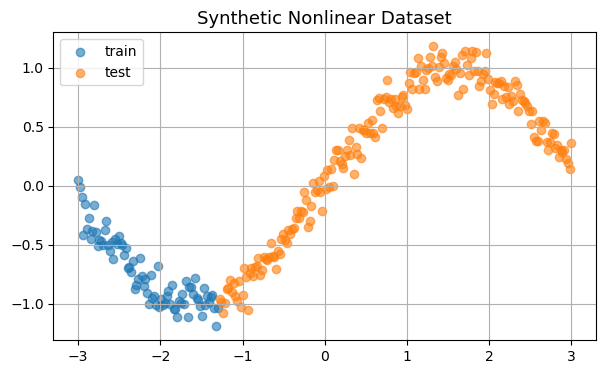

Width  2: final train loss = 0.0111, test loss = 2.2771
Width  4: final train loss = 0.0109, test loss = 0.4756
Width  8: final train loss = 0.0108, test loss = 2.6587
Width 16: final train loss = 0.0097, test loss = 4.6350
Width 32: final train loss = 0.0105, test loss = 2.4057
Width 64: final train loss = 0.0097, test loss = 6.9170


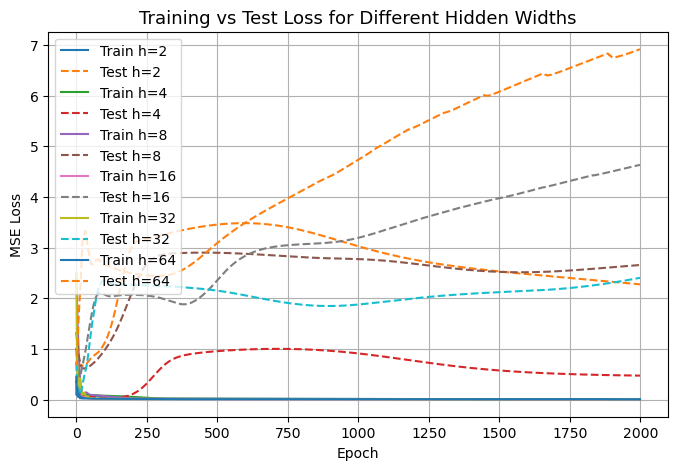

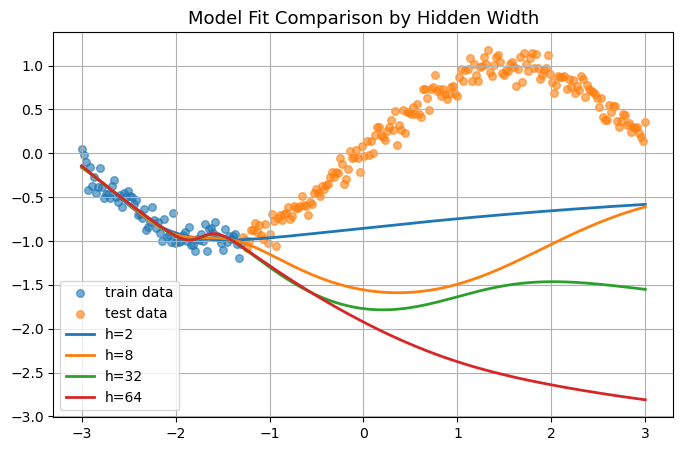

In [17]:
# ============================================================
# Challenge 4 – Hidden-Width Ablation Study (Capacity vs Overfitting)
# ============================================================

torch.manual_seed(42)

# ------------------------------------------------------------
# 1. Generate synthetic nonlinear data (y = sin(x) + noise)
# ------------------------------------------------------------
n_train, n_test = 80, 200
x_all = torch.linspace(-3, 3, n_train + n_test).unsqueeze(1)
y_true = torch.sin(x_all) + 0.1 * torch.randn_like(x_all)

x_train, x_test = x_all[:n_train], x_all[n_train:]
y_train, y_test = y_true[:n_train], y_true[n_train:]

plt.figure(figsize=(7, 4))
plt.scatter(x_train, y_train, label="train", color="tab:blue", alpha=0.6)
plt.scatter(x_test,  y_test,  label="test",  color="tab:orange", alpha=0.6)
plt.title("Synthetic Nonlinear Dataset", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 2. Define a function to train a simple 1-hidden-layer MLP
# ------------------------------------------------------------
def train_mlp(hidden_size, n_epochs=2000, lr=0.01):
    model = nn.Sequential(
        nn.Linear(1, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, 1)
    )
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    
    losses_train, losses_test = [], []
    for epoch in range(n_epochs):
        # Train
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
        # Evaluate
        with torch.no_grad():
            test_loss = loss_fn(model(x_test), y_test)
        losses_train.append(loss.item())
        losses_test.append(test_loss.item())
        
    return model, losses_train, losses_test

# ------------------------------------------------------------
# 3. Run experiments for different hidden widths
# ------------------------------------------------------------
widths = [2, 4, 8, 16, 32, 64]
results = {}

for w in widths:
    model, l_train, l_test = train_mlp(hidden_size=w)
    results[w] = (l_train, l_test)
    print(f"Width {w:>2}: final train loss = {l_train[-1]:.4f}, test loss = {l_test[-1]:.4f}")

# ------------------------------------------------------------
# 4. Plot training vs test loss for each width
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
for w in widths:
    plt.plot(results[w][0], label=f"Train h={w}")
    plt.plot(results[w][1], linestyle='--', label=f"Test h={w}")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Test Loss for Different Hidden Widths", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 5. Visualize model fits
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, s=30, color='tab:blue', alpha=0.6, label='train data')
plt.scatter(x_test, y_test, s=30, color='tab:orange', alpha=0.6, label='test data')

x_dense = torch.linspace(-3, 3, 400).unsqueeze(1)
for w in [2, 8, 32, 64]:
    y_pred = train_mlp(w, n_epochs=3000)[0](x_dense).detach()
    plt.plot(x_dense, y_pred, lw=2, label=f"h={w}")

plt.title("Model Fit Comparison by Hidden Width", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()


1. Training vs Test Loss Patterns

| Width (h) | Train Loss ↓                               | Test Loss →      | Interpretation                          |
| --------- | ------------------------------------------ | ---------------- | --------------------------------------- |
| **2–4**   | Low capacity → can’t fit nonlinear pattern | Test loss high   | **Underfitting**                        |
| **8–16**  | Good balance between bias and variance     | Test loss stable | **Best generalization zone** ✅          |
| **32–64** | Training loss ≈ 0                          | Test loss rises  | **Overfitting** — model memorizes noise |


Visually, the train curves monotonically drop with capacity, while test loss first decreases then rises — the textbook U-shaped generalization curve.

2. Model Fit Plot (Bottom Figure)

- h = 2, 4: Linear or slightly curved → cannot capture the sinusoidal oscillation.

- h = 8, 16: Follows the wave smoothly — ideal fit.

- h = 64: Overly flexible, sharp oscillations, and extrapolation instability — classic overfit.

3. Insight

- Increasing $h$ increases parameter count roughly as:


$N params =(1×h+h)+(h×1+1)=2h+h+1=3h+1$

which scales linearly but increases representational power superlinearly.

- Overfitting emerges as $h$ grows large relative to **training samples (80)** — too many degrees of freedom, not enough constraints.



💡 takeaway

| Analogy          | ML Term              | Finance Parallel                                         |
| ---------------- | -------------------- | -------------------------------------------------------- |
| Bias             | Underfitting         | Model too rigid → fails to capture nonlinear risk premia |
| Variance         | Overfitting          | Model overreacts to noise → unstable out-of-sample PnL   |
| Regularization   | Smoothing constraint | Shrinkage or turnover limits in portfolio weights        |
| Cross-validation | Generalization check | Out-of-sample performance / stress testing               |
